In [6]:
from utils import *
from sklearn.metrics import mean_squared_error
from math import sqrt

In [18]:
um= pd.read_csv('csv\\utility_matrix.csv',index_col=0)

In [19]:
import numpy as np
print('Masking 20 % of the data to test')
mask = np.ones((2000,2000))
mask[1600:,1600:]=0
data_to_test=np.array(um)
data_to_test[np.logical_not(mask)] = None
data_to_test_df=pd.DataFrame(data_to_test,columns= um.axes[1],index=um.axes[0])
print('Mask done')


Masking 20 % of the data to test
Mask done


In [20]:
u_sim_matrix=user_similarity(data_to_test_df,400,standardize_matrix=True)
q_sim_matrix=query_similarity(data_to_test_df,400,standardize_matrix=True)


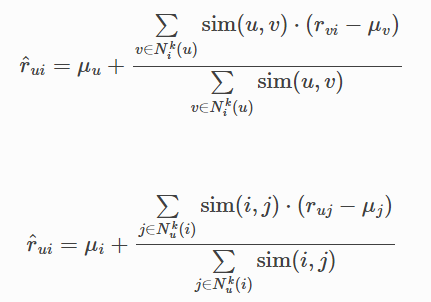

In [5]:
output=data_to_test_df.fillna(0)
q_mean=data_to_test_df.mean(axis = 0, skipna = True)
q_diff=pd.DataFrame(np.array(data_to_test_df)-np.array(q_mean),columns=um.columns,index=um.index).fillna(0)
scores_to_predict = np.array(np.where(data_to_test_df.fillna(0)== 0)).T  
for i,j in scores_to_predict:
        weighted_score=np.dot(q_diff.iloc[i],q_sim_matrix[j])
        weights_used=np.dot(q_sim_matrix[j],data_to_test_df.iloc[i].notna())
        output.iloc[i,j]=round(weighted_score/weights_used+q_mean.iloc[i],2)

In [ ]:
pred1=output[um.notna()]
y_pred=np.array(pred1.fillna(0))[np.logical_not(mask)]
y_truth=np.array(um.fillna(0))[np.logical_not(mask)]
rmse=sqrt(mean_squared_error(y_pred,y_truth))

In [21]:
output=data_to_test_df.fillna(0)
u_mean=data_to_test_df.mean(axis = 1, skipna = True)
u_diff=pd.DataFrame(np.array(data_to_test_df)-np.array(u_mean).T,columns=um.columns,index=um.index).fillna(0)
scores_to_predict = np.array(np.where(data_to_test_df.fillna(0)== 0)).T  
columns=output.axes[1]
for i,j in scores_to_predict:
        weighted_score=np.dot(u_diff[columns[j]],u_sim_matrix[i])
        weights_used=np.dot(u_sim_matrix[i],data_to_test_df[columns[j]].notna())
        output.iloc[i,j]=round(weighted_score/weights_used+u_mean.iloc[i],2)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10752\2263634346.py:9: RuntimeWarning: invalid value encountered in double_scalars
  output.iloc[i,j]=round(weighted_score/weights_used+u_mean.iloc[i],2)


In [22]:
pred1=output[um.notna()]
y_pred=np.array(pred1.fillna(0))[np.logical_not(mask)]
y_truth=np.array(um.fillna(0))[np.logical_not(mask)]
rmse=sqrt(mean_squared_error(y_pred,y_truth))